In [1]:
# Dependencies.
# Pandas.
import pandas as pd
import hvplot.pandas

# Seaborn.
import seaborn as sns

# SK learn.
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Suppress warnings.
import warnings
warnings.filterwarnings('ignore')

In [2]:
# First, load the data.
filepath = "Resources/crypto_market_data.csv"
df = pd.read_csv(filepath)

# Check out the data.
display(df.info())
display(df.head())
display(df.agg(['min', 'max']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   coin_id                       41 non-null     object 
 1   price_change_percentage_24h   41 non-null     float64
 2   price_change_percentage_7d    41 non-null     float64
 3   price_change_percentage_14d   41 non-null     float64
 4   price_change_percentage_30d   41 non-null     float64
 5   price_change_percentage_60d   41 non-null     float64
 6   price_change_percentage_200d  41 non-null     float64
 7   price_change_percentage_1y    41 non-null     float64
dtypes: float64(7), object(1)
memory usage: 2.7+ KB


None

,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
0,bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
1,ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
2,tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
3,ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
4,bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384


,coin_id,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
min,binance-usd,-13.52786,-6.09456,-18.15890,-34.70548,-44.82248,-0.39210,-17.56753
max,zcash,4.84033,20.69459,24.23919,140.79570,223.06437,2227.92782,7852.08970


In [3]:
# Quick plot to see the data.
df.hvplot.line()

:NdOverlay   [Variable]
   :Curve   [index]   (value)

In [4]:
# Preparation.
try:
    df = df.set_index('coin_id')
except:
    print("Re-running the cell, are we?")
    
df.head()

# Scale the data.
# Make a scaler.
scaler = StandardScaler()

# Fit it (find stdev and mean.
scaler.fit(df)

# Make DF with scaled data and original colum names/index.
df_scaled = pd.DataFrame(scaler.transform(df), columns = df.columns, index = df.index)
df_scaled.head()


,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317


In [5]:
# Define X.
X = df_scaled

In [6]:
# Find the optimal inertia value using elbow.
# List of inertia values.
inertia = []

# List of K values.
k = list(range(1, 12))

for i in k:
    # Make and fit test model.
    k_model = KMeans(n_clusters = i, random_state = 1)
    k_model.fit(X)
    preds = k_model.predict(X)

    # Evaluation.
    inertia.append(k_model.inertia_)

    print(f"Iteration {i} of {max(k)} completed.")

Iteration 1 of 11 completed.
Iteration 2 of 11 completed.
Iteration 3 of 11 completed.
Iteration 4 of 11 completed.
Iteration 5 of 11 completed.
Iteration 6 of 11 completed.
Iteration 7 of 11 completed.
Iteration 8 of 11 completed.
Iteration 9 of 11 completed.
Iteration 10 of 11 completed.
Iteration 11 of 11 completed.


In [7]:
# Make a DF to plot the inertia.
elbow_data = {
    "k": k,
    "inertia": inertia
}

df_elbow = pd.DataFrame(elbow_data)
df_elbow["acc"] = df_elbow.inertia.diff()

# Look at it.
display(df_elbow)


,k,inertia,acc
0,1,287.000000,NaN
1,2,195.820218,-91.179782
2,3,123.190482,-72.629736
3,4,79.022435,-44.168046
4,5,65.405923,-13.616512
5,6,52.933559,-12.472365
6,7,47.983124,-4.950435
7,8,37.288187,-10.694937
8,9,33.061685,-4.226502
9,10,28.779752,-4.281932


In [8]:
# Plot it.
df_elbow.hvplot.line(
    x = 'k',
    y = 'inertia'
)

:Curve   [k]   (inertia)

# What is the best value for K?
Appears to be either 3 or 4 but I believe that 4 is a stronger fit. The change in slope at 4 is higher than at any other point on the graph.



In [9]:
# Copy the data.
df_sub = df_scaled.copy()

# Make the model.
model = KMeans(n_clusters = 4, random_state = 1)
model.fit(X)
preds = model.predict(X)

# Add the clusters to the DF.
df_sub['clusters'] = preds

# Check.
df_sub.head()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,clusters
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,3
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,3
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,1
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,1
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,3


In [10]:
# Plot the model.
df_sub.hvplot.scatter(
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    c = 'clusters',
    hover_cols = 'coin_id'
)

:Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

<Axes: >

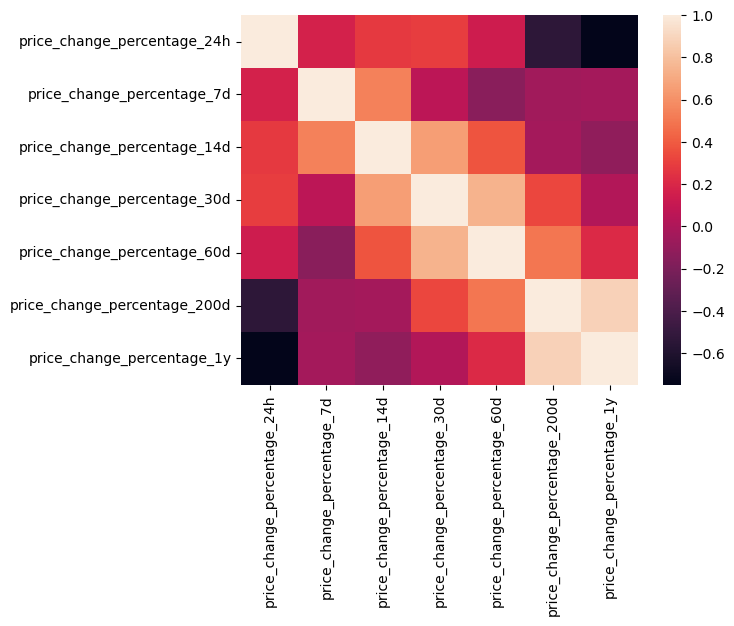

In [11]:
# Find out if we have multi-collinearity.
corrs = df_scaled.corr()
sns.heatmap(corrs)

In [12]:
# ... We do. Let's use PCA to fix that.
n_components = 3
pca = PCA(n_components = n_components)

# Fit and transform data.
df_pca = pd.DataFrame(pca.fit_transform(df_scaled), columns = ["PCA_" + str(j) for j in range(1, n_components + 1)])
df_pca = df_pca.set_index(df.index)

# View it.
df_pca.head()

,PCA_1,PCA_2,PCA_3
coin_id,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


<Axes: >

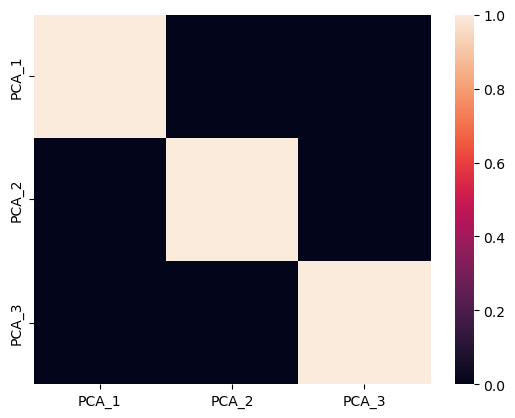

In [13]:
# Check for correlation again.
corrs = df_pca.corr()
sns.heatmap(corrs)

In [14]:
# Explained variance.
explained_variance = pca.explained_variance_
total_explained_variance = explained_variance.sum()

print(f"Explained Variance: {explained_variance}")
print(f"Total Explained Variance: {total_explained_variance}")

Explained Variance: [2.6689967  2.48978331 1.26307212]
Total Explained Variance: 6.421852139197314


# What is the total explained variance of the three principal components?
The actual value is 6.42... but to interpret the number: it is the total amount of variance in the original dataset that is now explained through the PCA components. Each component has an individual value as well that shows how much of the variance of the original dataset it is explaining.

In [15]:
# Define X.
X = df_pca

In [16]:
# Find the optimal inertia value using elbow.
# ... this looks familiar.
# List of inertia values.
inertia = []

# List of K values.
k = list(range(1, 12))

for i in k:
    # Make and fit test model.
    k_model = KMeans(n_clusters = i, random_state = 1)
    k_model.fit(X)
    preds = k_model.predict(X)

    # Evaluation.
    inertia.append(k_model.inertia_)

    print(f"Iteration {i} of {max(k)} completed.")

Iteration 1 of 11 completed.
Iteration 2 of 11 completed.
Iteration 3 of 11 completed.
Iteration 4 of 11 completed.
Iteration 5 of 11 completed.
Iteration 6 of 11 completed.
Iteration 7 of 11 completed.
Iteration 8 of 11 completed.
Iteration 9 of 11 completed.
Iteration 10 of 11 completed.
Iteration 11 of 11 completed.


In [17]:
# Make a DF to plot the inertia.
elbow_data = {
    "k": k,
    "inertia": inertia
}

df_pca_elbow = pd.DataFrame(elbow_data)
df_pca_elbow["acc"] = df_pca_elbow.inertia.diff()

# Look at it.
display(df_pca_elbow)

,k,inertia,acc
0,1,256.874086,NaN
1,2,165.901994,-90.972092
2,3,93.774626,-72.127368
3,4,49.665497,-44.109129
4,5,38.352251,-11.313245
5,6,27.618972,-10.733279
6,7,21.134056,-6.484916
7,8,17.437664,-3.696392
8,9,13.742792,-3.694872
9,10,10.484890,-3.257901


In [18]:
# Plot it.
df_pca_elbow.hvplot.line(
    x = 'k',
    y = 'inertia'
)


:Curve   [k]   (inertia)

# What is the best value for k when using the PCA data?
Best value for K seems to be 4 based on the graph. Last hard turn before the line slopes down evenly.

# Does it differ from the best k value found using the original data?
No! 

In [19]:
# Copy the data.
df_pca_sub = df_pca.copy()

# Make the model.
model = KMeans(n_clusters = 4, random_state = 1)
model.fit(X)
preds = model.predict(X)

# Add the clusters to the DF.
df_pca_sub['clusters'] = preds

# Check.
df_pca_sub.head()

,PCA_1,PCA_2,PCA_3,clusters
coin_id,,,,
bitcoin,-0.600667,0.842760,0.461595,1
ethereum,-0.458261,0.458466,0.952877,1
tether,-0.433070,-0.168126,-0.641752,0
ripple,-0.471835,-0.222660,-0.479053,0
bitcoin-cash,-1.157800,2.041209,1.859715,1


In [20]:
# Plot the model.
df_pca_sub.hvplot.scatter(
    x = 'PCA_1',
    y = 'PCA_2',
    c = 'clusters',
    hover_cols = 'coin_id'
)

:Scatter   [PCA_1]   (PCA_2,clusters,coin_id)

In [21]:
# Compare and contrast elbow plots.
df_pca_elbow.hvplot.line(
    x = 'k',
    y = 'inertia',
    width = 500,
    title = "PCA"
) + df_elbow.hvplot.line(
    x = 'k',
    y = 'inertia',
    width = 500,
    title = "Raw"
)

:Layout
   .Curve.I  :Curve   [k]   (inertia)
   .Curve.II :Curve   [k]   (inertia)

In [22]:
# Compare and contrast scatter plots.
df_pca_sub.hvplot.scatter(
    x = 'PCA_1',
    y = 'PCA_2',
    c = 'clusters',
    hover_cols = 'coin_id',
    width = 500,
    title = "PCA"
) + df_sub.hvplot.scatter(
    x = 'price_change_percentage_24h',
    y = 'price_change_percentage_7d',
    c = 'clusters',
    hover_cols = 'coin_id',
    width = 500,
    title = "Raw"
)


:Layout
   .Scatter.I  :Scatter   [PCA_1]   (PCA_2,clusters,coin_id)
   .Scatter.II :Scatter   [price_change_percentage_24h]   (price_change_percentage_7d,clusters,coin_id)

---

### What is the impact of using fewer features to cluster the data using K-Means?
In terms of using PCA to lower the amount of features with which to cluster:

We have lost all ability to explain the features. There is nothing to be said about PCA_1 or PCA_2 or PCA_3.
We guaranteed that we do not violate the linear assumption... our values are not related to each other.
However... for this case, we did not reduce the amount of clusters or make the clusters more reliable.
